### Home Assignment: Semantic Memory Brain Activity Analysis

Course code: M_PROPSY

Course coordinator: Matthias Nau

Teaching assistant: Anna van Harmelen

Student: Bita Tehranfar

Date: 3/12/2024

This is an assignment for the course Cognitive Neuroscience Programming, conducted at the Vrije Universiteit of Amsterdam. The goal of this assignment is to analyze fMRI data to visualize and interpret brain activity related to semantic memory. The fMRI dataset was obtained from NeuroSynth, a platform that facilitates large-scale meta-analyses of brain imaging data.

### Dataset Information: 

Two files were utilized in this analysis:

Functional MRI Data: Reflects voxel-level brain activity associated with semantic memory tasks.

Anatomical MRI Data: Provides a structural reference for overlaying the functional data.

Both files were sourced from the NeuroSynth repository under the following sections:

Semantic Memory: Uniformity Test

Anatomical Reference Image


### Step1: Searching for MRI Files
In this section, we use Python's `glob` module to search for all MRI files within the specified directory. The pattern `*.nii.gz` is used to match the functional MRI files, which have the `.nii.gz` extension. 


The argument `recursive=True` allows us to search within all subdirectories of the given folder. This means that no matter where the MRI files are located within the project folder, they will be found and stored in the `MRI_files` list.

**Note**: The `directory` path is the folder where the MRI files are stored, and the `glob` function dynamically collects all matching files for later use.

In [1]:
import glob 
import os

# The directory where you want to search for files
directory= r"C:\Users\Bita Tehranfar\Desktop\project"
# The extension for MRI files
extension= "*nii.gz"
MRI_files= glob.glob(os.path.join(directory, "**", "*.nii.gz"), recursive=True)

## Step2: Loading the MRI Files with Nilearn
In this cell, we use the `nilearn` library to load the functional and anatomical MRI images. The `load_img` function is used to load the first file from the `MRI_files` list, which contains the paths to all the MRI files we found in the previous step.

Here, we load both the functional MRI (`functional_img`) and anatomical MRI (`anatomical_img`) using the same file, which may need to be updated depending on your specific dataset. 


In [2]:

from nilearn import plotting
from nilearn.image import load_img

functional_img = load_img(MRI_files[0]) 
anatomical_img = load_img(MRI_files[0])

### Step3: Plotting the Functional Data on Top of the Anatomical Scan
In this step, we use the `nilearn.plotting.plot_stat_map` function to visualize the functional MRI data (`functional_img`) on top of the anatomical scan (`anatomical_img`). The anatomical image serves as the background for the statistical map, making it easier to interpret the locations of brain activity.


Key arguments used in this function:
- **stat_map_img (functional_img)**: The fMRI image that displays the brain activity (i.e., the statistical map of brain activation).
- **bg_img (anatomical_img)**: The anatomical image is used as the background for the visualization, allowing us to see the brain's structure alongside the functional data.
- **cmap ("hot")**: This defines the color map for visualizing the data. The `"hot"` colormap transitions from black to red to yellow, indicating increasing levels of brain activity.
- **threshold (0.1)**: This sets a threshold to filter out low-intensity brain activity. Only regions with a voxel intensity above 0.1 are shown.
- **cut_coords (0, -10, 20)**: These are the coordinates at which to slice the brain for the visualization. These coordinates correspond to the regions of interest based on the functional data.
- **display_mode ("ortho")**: The `"ortho"` display mode shows three orthogonal slices (axial, coronal, sagittal) for a more comprehensive view of the brain activity.
- **draw_cross (True)**: This option adds a crosshair to the plot, helping to visualize the orientation of the brain slices.
- **colorbar (True)**: This option adds a color bar to the side of the plot, showing the relationship between the color intensity and voxel values.

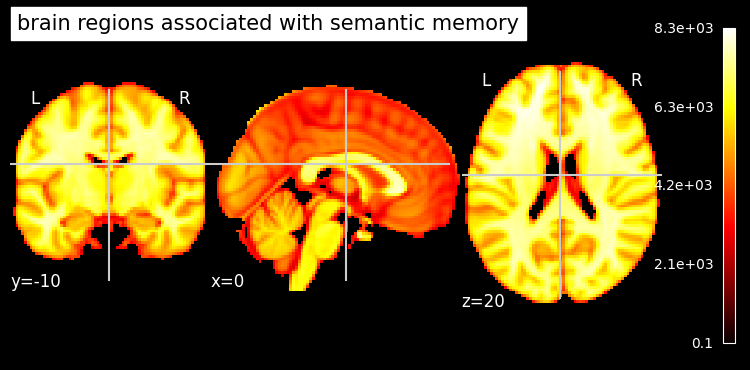

In [ ]:
# Visualizing functional data on the anatomical scan
plotting.plot_stat_map(functional_img,
                       bg_img=anatomical_img, # Background image
                       title='brain regions associated with semantic memory',
                       cmap="hot",  # Colormap 
                       threshold=0.1,  # Voxel threshold to exclude values below 0.1
                       cut_coords=(0, -10, 20),
                       display_mode="ortho",   # View mode 
                       draw_cross=True,    # Draw crosshairs for orientation
                       colorbar=True)  # Show colorbar

display.savefig('brain_activation.png', dpi=300)


### Step 4: Analyzing Positive Brain Activity
In this section, we load the functional MRI data using the `nibabel` library. The data is then converted into a NumPy array using the `get_fdata()` method, which allows us to manipulate and analyze the voxel values.

We select only the positive voxel intensity values, which represent brain activity, excluding any background or non-active regions. The positive values are then used to plot a histogram to show their distribution across the brain.

Key elements in this analysis:
- **positive_values**: The subset of voxel intensity values greater than zero, which correspond to regions of the brain with activity.
- **plt.hist()**: This function is used to create a histogram of the positive values, with 50 bins, a green color, and black edges for each bar.
- **plt.title()**: The title of the histogram, describing the brain activity in the regions involved in semantic memory.
- **plt.xlabel() and plt.ylabel()**: These labels describe the x-axis (voxel intensity) and y-axis (frequency of the intensity values) of the histogram.
- **plt.grid()**: Adds a grid to the plot to enhance readability.

This histogram helps us visualize the distribution of brain activity in the regions involved in semantic memory, making it easier to interpret the results.


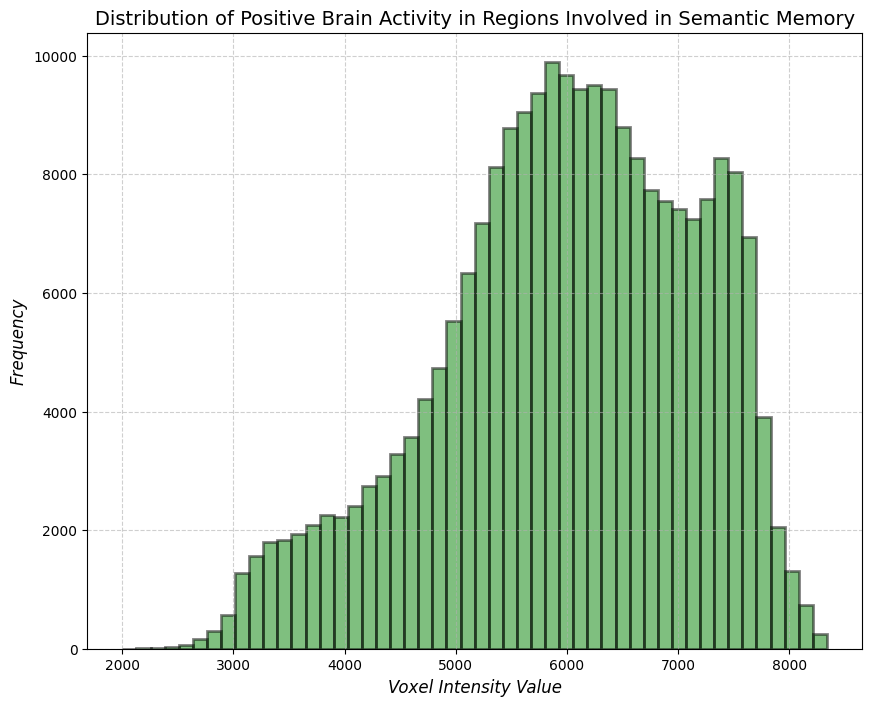

In [ ]:


import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Load the functional MRI data
functional_img = nib.load(MRI_files[0])

# Convert the data to a NumPy array
data = functional_img.get_fdata()

# Select only positive values
positive_values = data[data > 0]

# Plot the histogram of the positive values
plt.figure(figsize=(10, 8))
plt.hist(positive_values, bins=50, color='green', edgecolor='black', alpha=0.5, linewidth=2)
plt.title('Distribution of Positive Brain Activity in Regions Involved in Semantic Memory', fontsize=14)
plt.xlabel('Voxel Intensity Value', fontsize=12, fontstyle='italic')  
plt.ylabel('Frequency', fontsize=12, fontstyle='italic') 
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('Distribution_of_Positive_Brain_Activity.png', dpi=300, bbox_inches='tight')
plt.show
plt.close


Thank you!
Please reach out if you have any further questions or suggestions!